# Task One: Data Preparation and Customer Analytics

Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load both datasets
transaction_data = pd.read_excel('../data/raw/QVI_transaction_data.xlsx')
customer_data = pd.read_csv('../data/raw/QVI_purchase_behaviour.csv')

## Exploratory Data Analysis (EDA)

### Examine transaction data

In [3]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


We can see that there are **no missing values** in this dataset. However, the `DATE` column is of type **int64** and contains numeric values such as 43390 and 43599. These represent **serial dates**—a format that counts the number of days since a starting reference point, typically December 30, 1899, in Excel.

### Examine `DATE`

#### Convert serial dates to proper date format

In [5]:
transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"], origin="1899-12-30", unit="D")
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


We're only interested in the date itself and won't need the time details later, so let's remove the timestamps and retain only the date.

#### Remove timestamps

In [6]:
transaction_data["DATE"] = transaction_data["DATE"].dt.date
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Now that our dataset includes only dates, let's check the range of dates.

#### Check the date range

##### Check the most common date

In [7]:
transaction_data["DATE"].describe()

count         264836
unique           364
top       2018-12-24
freq             939
Name: DATE, dtype: object

We can see that the most common date is **2018-12-24**, which falls on Christmas Eve, a peak shopping day when many people purchase gifts and groceries for the holiday season. Now, let's check the earliest and latest dates.

##### Check the earliest and latest date

In [8]:
earliest_date = transaction_data["DATE"].min()
latest_date = transaction_data["DATE"].max()

print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")

Earliest date: 2018-07-01
Latest date: 2019-06-30


We can see that the dataset represents **a full year's worth of data**, spanning from July 1, 2018, to June 30, 2019. Since neither year includes February 29, the dataset does not contain a leap day. Now, let's verify this by checking if there are exactly 365 unique dates.

##### Check the number of unique dates

In [9]:
transaction_data["DATE"].describe()

count         264836
unique           364
top       2018-12-24
freq             939
Name: DATE, dtype: object

The unique count of dates in the `DATE` column is **364**, yet a full year's worth of data should contain 365 days. This discrepancy implies that one date is missing from the dataset. Now, let's check the missing date in the dataset.

##### Check the missing date

In [ ]:
all_dates = pd.date_range(earliest_date, latest_date)

missing_date = set(all_dates.date) - set(transaction_data["DATE"].unique())
print("Missing date:", missing_date)

Missing date: {datetime.date(2018, 12, 25)}


The missing date in the dataset is **2018-12-25**, which falls on Christmas Day. This suggests that no transactions were recorded on this day, likely because stores were closed for the holiday.

#####  Visualize the Daily Transaction Distribution

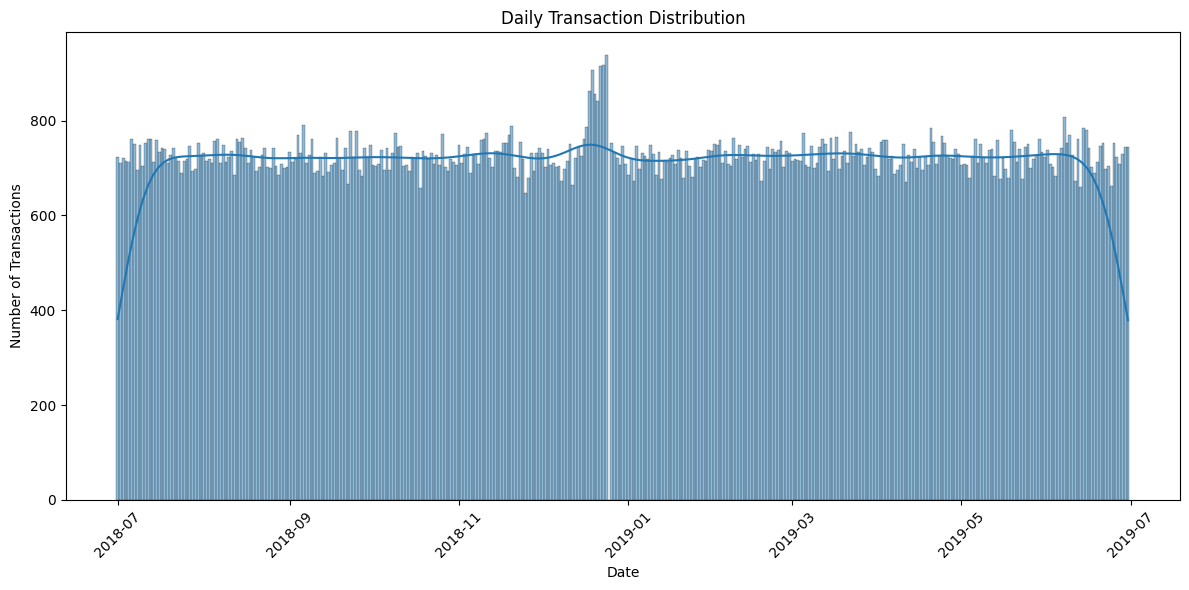

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(transaction_data["DATE"], bins=len(all_dates), kde=True)
plt.title("Daily Transaction Distribution")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('../outputs/figures/daily_transaction_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

As observed:

- **Consistent Transaction Volume**: The stores maintained a steady flow of transactions on most days, indicating stable customer activity.
- **Seasonal Peaks**: The noticeable spike on Christmas Eve (2018-12-24) suggests a surge in shopping activity due to holiday preparations, which is typical for retail businesses.
- **No Transactions on Christmas Day**: The gap on Christmas Day (2018-12-25) indicates that no transactions were recorded, likely because the stores were closed for the holiday.